https://janakiev.com/blog/jupyter-virtual-envs/

The idea here is to plot a scatter plot of all the observations ever made by Hubble space telescope.

Hubble field of view is 202 x 202 arc seconds. Resolution is 0.04 arc seconds. 

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
(4*np.pi)/((202./3600*2*np.pi/180.)**2)

3275649.310070543

In principle, 3.3 million or so observations by HST should be enough to cover the entire night sky. Last I checked, it's done about 1.4 million, and obviously not all observations are created equal - most of its science is exposure rather than diffraction limited.

In [9]:
from astroquery.mast import Observations

In [10]:
print(Observations.list_missions())

['BEFS', 'EUVE', 'FUSE', 'GALEX', 'HLA', 'HLSP', 'HST', 'HUT', 'IUE', 'JWST', 'K2', 'K2FFI', 'Kepler', 'KeplerFFI', 'OPO', 'PS1', 'SPITZER_SHA', 'SWIFT', 'TESS', 'TUES', 'WUPPE']


In [46]:
obs_table=Observations.query_criteria(dataproduct_type=["image"],
                                      proposal_pi="Osten*",
                                      s_dec=[43.5,45.5])

In [47]:
print(obs_table)

dataproduct_type calib_level obs_collection ... intentType  obsid     objID  
---------------- ----------- -------------- ... ---------- -------- ---------
           image           1            HST ...    science 24476662 124707496
           image           1            HST ...    science 24476663 124707593
           image           1            HST ...    science 24476664 121765190


In [48]:
obs_table.colnames

['dataproduct_type',
 'calib_level',
 'obs_collection',
 'obs_id',
 'target_name',
 's_ra',
 's_dec',
 't_min',
 't_max',
 't_exptime',
 'wavelength_region',
 'filters',
 'em_min',
 'em_max',
 'target_classification',
 'obs_title',
 't_obs_release',
 'instrument_name',
 'proposal_pi',
 'proposal_id',
 'proposal_type',
 'project',
 'sequence_number',
 'provenance_name',
 's_region',
 'jpegURL',
 'dataURL',
 'dataRights',
 'mtFlag',
 'srcDen',
 'intentType',
 'obsid',
 'objID']

In [49]:
obs_table.keep_columns(['s_ra','s_dec'])

In [50]:
print(obs_table)

     s_ra          s_dec     
-------------- --------------
341.7067159883 44.33381826126
341.7067159813 44.33381825835
341.7067159741 44.33381825535


In [51]:
np.array(obs_table)

array([(341.70671599, 44.33381826), (341.70671598, 44.33381826),
       (341.70671597, 44.33381826)],
      dtype=[('s_ra', '<f8'), ('s_dec', '<f8')])

Modified julian date (MJD) http://www.csgnetwork.com/julianmodifdateconv.html

In [53]:
obs_table=Observations.query_criteria(project="HST",
                                      t_min=[53005.,53005.+30.])

In [55]:
np.array(obs_table).shape

(4967,)

In [56]:
obs_table.keep_columns(['s_ra','s_dec'])

In [71]:
ra = np.array([x[0] for x in obs_table.as_array().data])
dec = np.array([x[1] for x in obs_table.as_array().data])

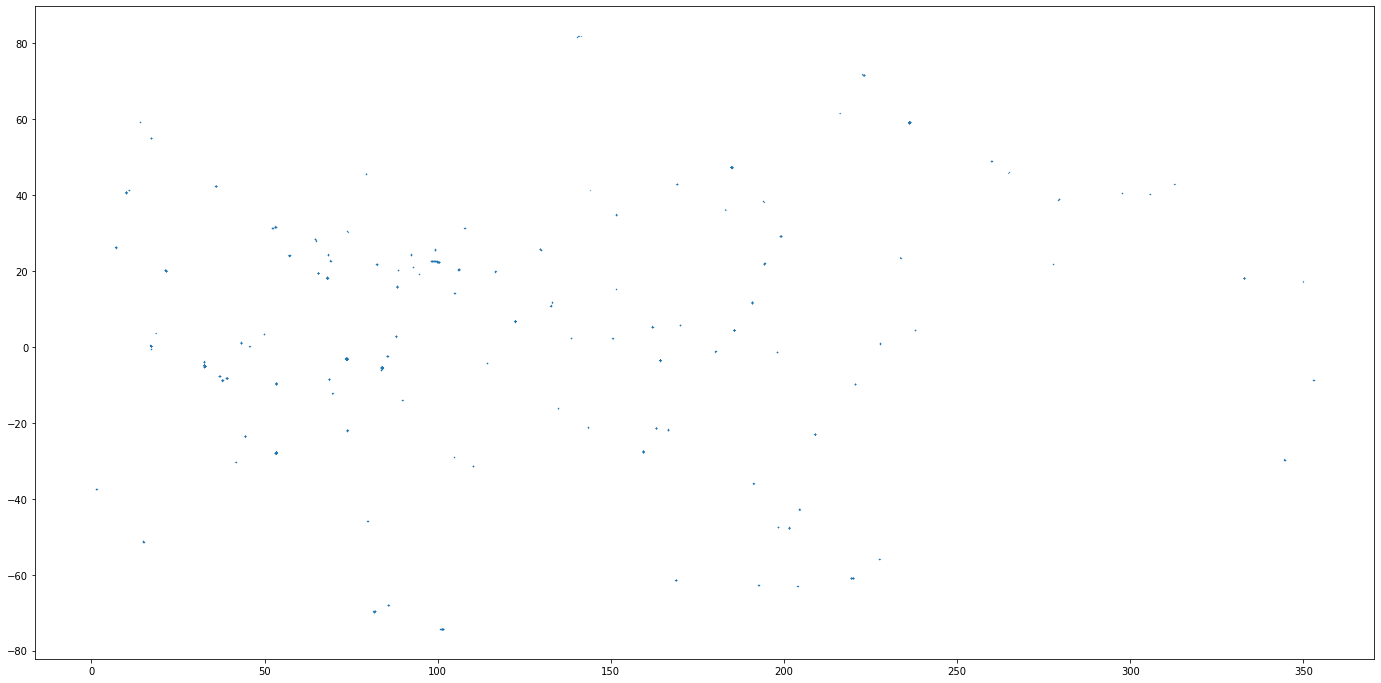

In [81]:
plt.figure(figsize=(24,12))
plt.scatter(ra,dec,marker='.',s=0.1)

Need to think a bit about how to mass produce this at scale. Data since 1990. 

In [82]:
obs_table=Observations.query_criteria(project="HST",
                                      t_min=[53005.,53005.+365.])

In [83]:
np.array(obs_table).shape

(45600,)

In [84]:
obs_table.keep_columns(['s_ra','s_dec'])

In [85]:
ra = np.array([x[0] for x in obs_table.as_array().data])
dec = np.array([x[1] for x in obs_table.as_array().data])

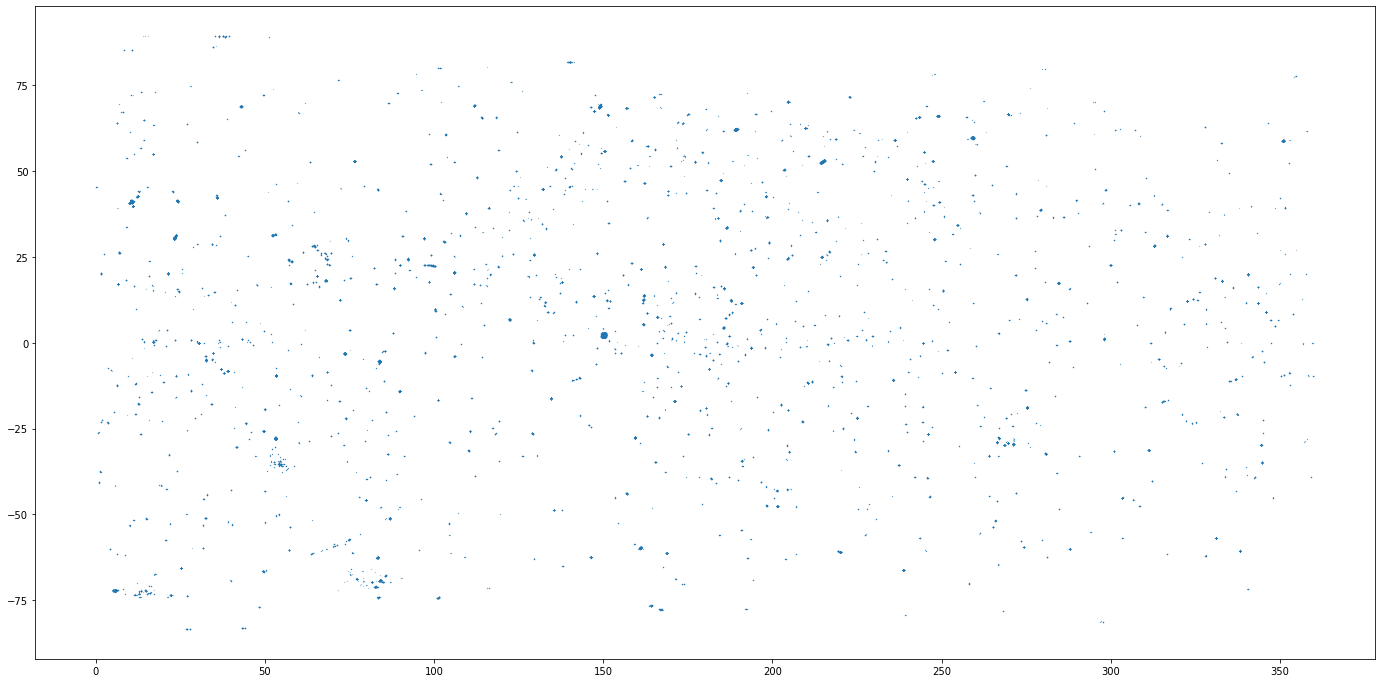

In [86]:
plt.figure(figsize=(24,12))
plt.scatter(ra,dec,marker='.',s=0.1)

MJD of 1/1/1990 is 47892. MJD of 1/1/2022 is 59580.

I did this section by hand over an hour or so.

In [121]:
obs_table=Observations.query_criteria(project="HST",
                                      t_min=[58849.,60676.])
obs_table.keep_columns(['s_ra','s_dec'])
ra = np.array([x[0] for x in obs_table.as_array().data])
dec = np.array([x[1] for x in obs_table.as_array().data])

In [122]:
np.savetxt("ra20.csv",ra,delimiter=",")
np.savetxt("dec20.csv",dec,delimiter=",")

In [123]:
ra.shape

(53646,)

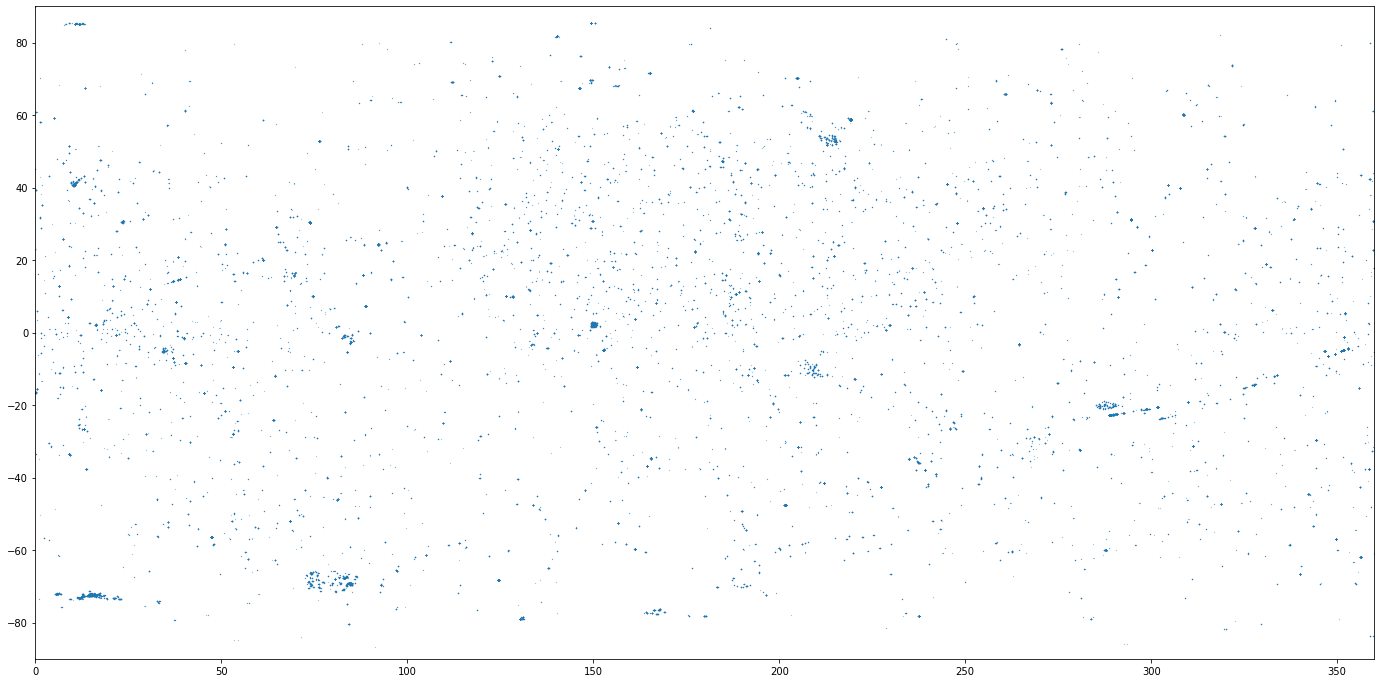

In [124]:
plt.figure(figsize=(24,12))
plt.xlim([0,360])
plt.ylim([-90,90])
plt.scatter(ra,dec,marker='.',s=0.1)

In [128]:
ra=np.concatenate([np.genfromtxt("ra"+i+".csv",delimiter=",") for i in ["90","95","00","05","10","15","20"]])
dec=np.concatenate([np.genfromtxt("dec"+i+".csv",delimiter=",") for i in ["90","95","00","05","10","15","20"]])

In [129]:
ra.shape

(953663,)

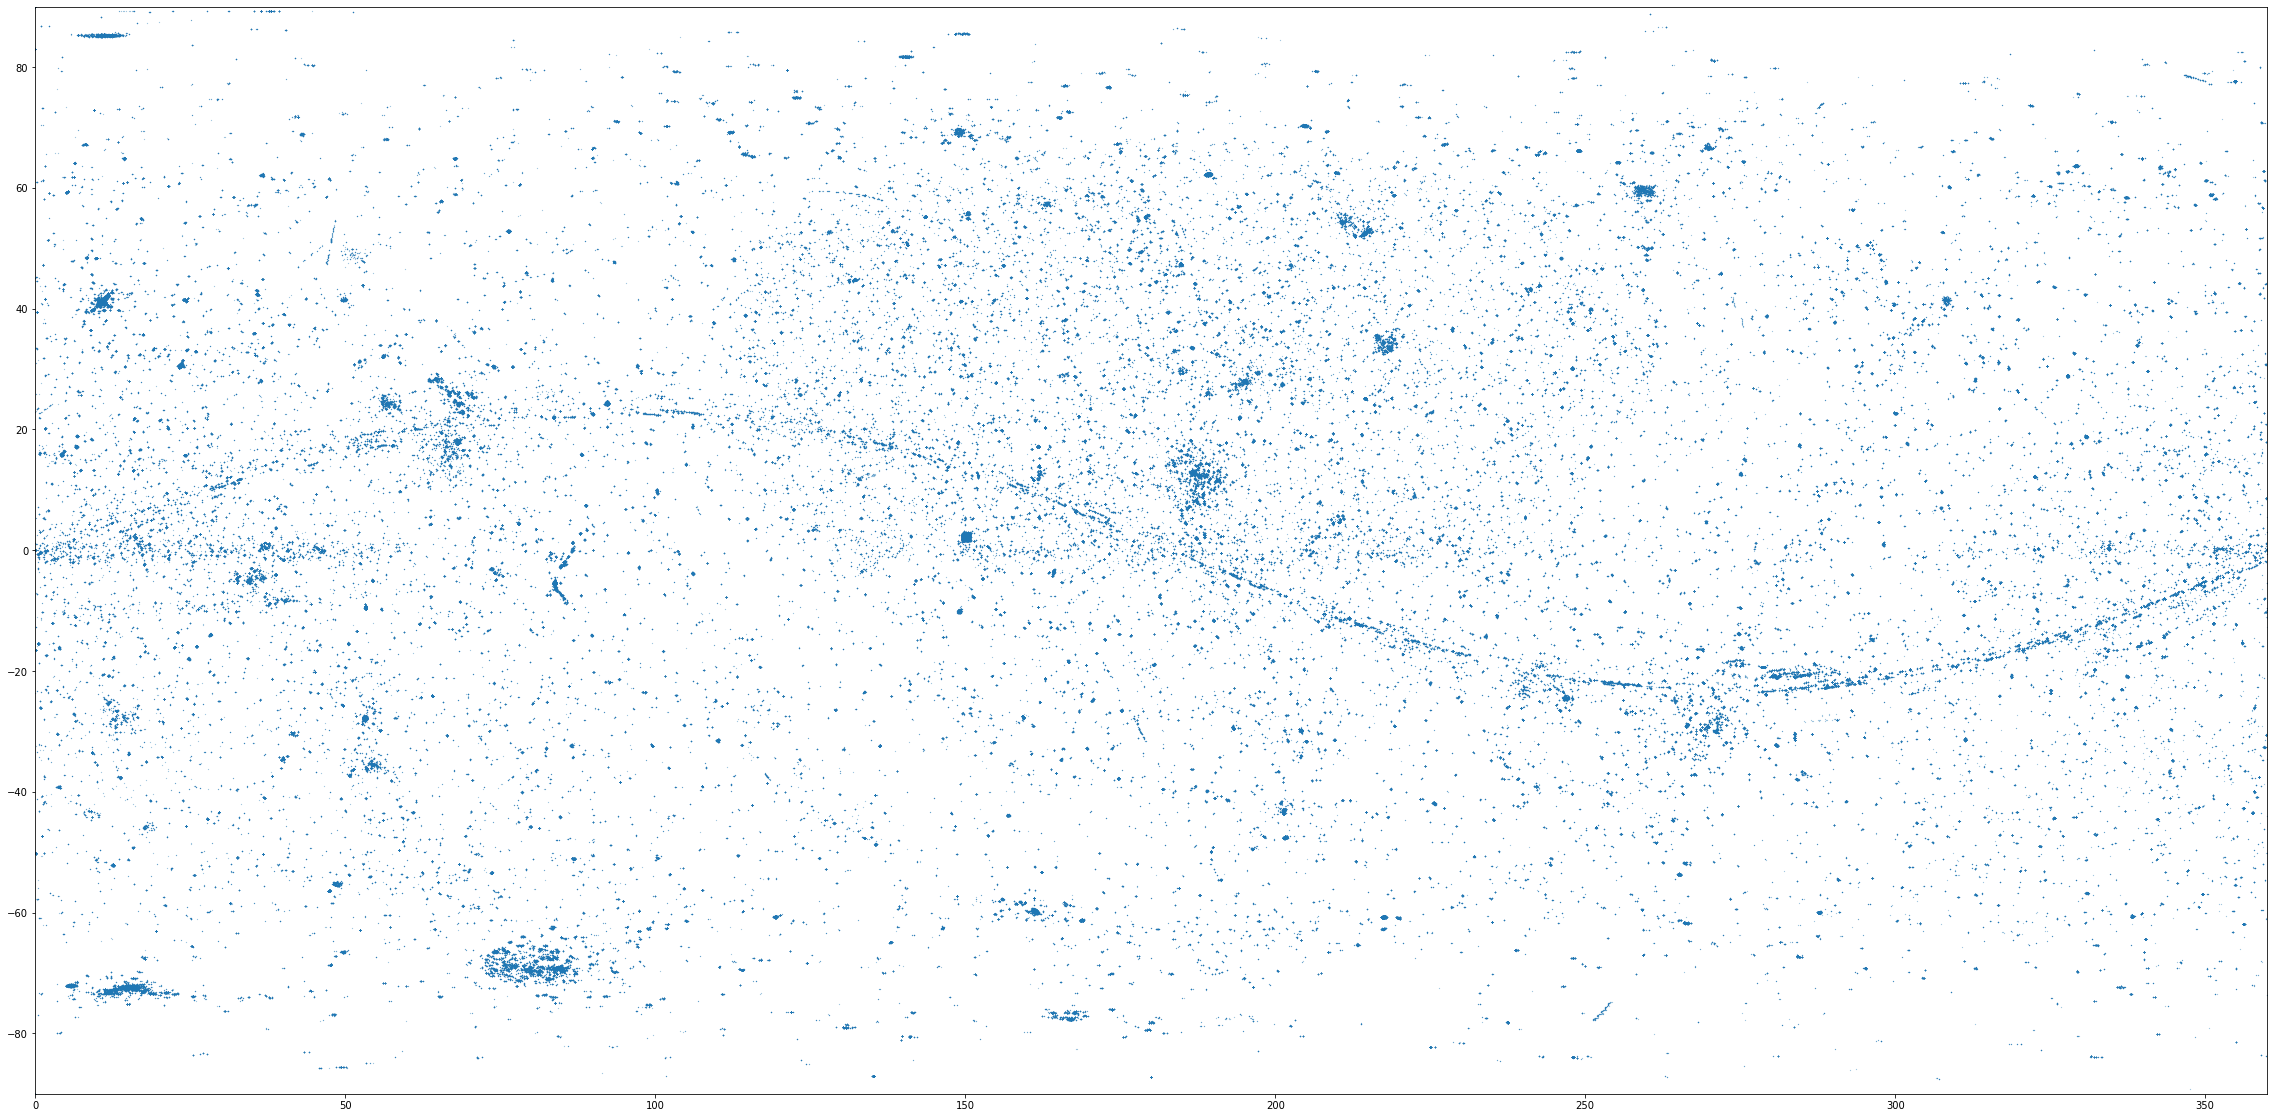

In [136]:
plt.figure(figsize=(40,20))
plt.xlim([0,360])
plt.ylim([-90,90])
plt.scatter(ra,dec,marker='.',s=0.1)

In [132]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_2651152/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML
